In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("glass.csv")

In [3]:
print(df.shape)
df.sample(10)

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
154,1.51694,12.86,3.58,1.31,72.61,0.61,8.79,0.00,0.00,3
202,1.51514,14.85,0.00,2.42,73.72,0.00,8.39,0.56,0.00,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
42,1.51779,13.21,3.39,1.33,72.76,0.59,8.59,0.00,0.00,1
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6
213,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7
47,1.52667,13.99,3.70,0.71,71.57,0.02,9.82,0.00,0.10,1
187,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
35,1.51567,13.29,3.45,1.21,72.74,0.56,8.57,0.00,0.00,1
69,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1


In [4]:
df.Type.value_counts() # So  we can consider it as classification problem.

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [5]:
print(df.duplicated().sum())

1


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
print(df.shape)
df.info()

(213, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      213 non-null    float64
 1   Na      213 non-null    float64
 2   Mg      213 non-null    float64
 3   Al      213 non-null    float64
 4   Si      213 non-null    float64
 5   K       213 non-null    float64
 6   Ca      213 non-null    float64
 7   Ba      213 non-null    float64
 8   Fe      213 non-null    float64
 9   Type    213 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.3 KB


In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


<AxesSubplot:>

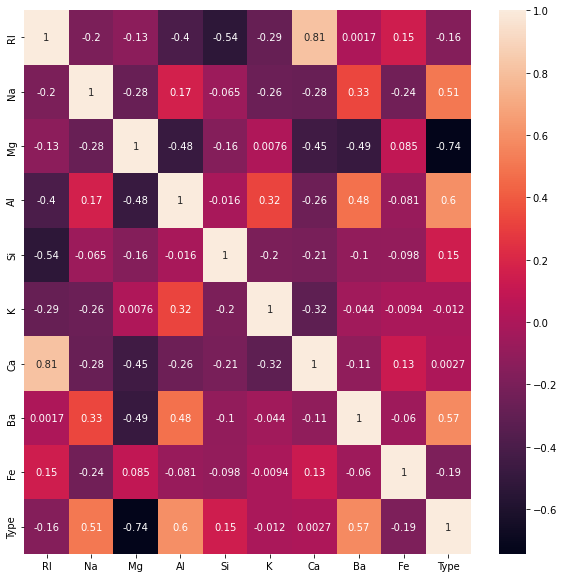

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(),annot=True)

In [10]:
# Deviding Feature and Target.
X = df.drop(["Type"], axis=1) # Feature
Y = df.iloc[:,-1] # Target

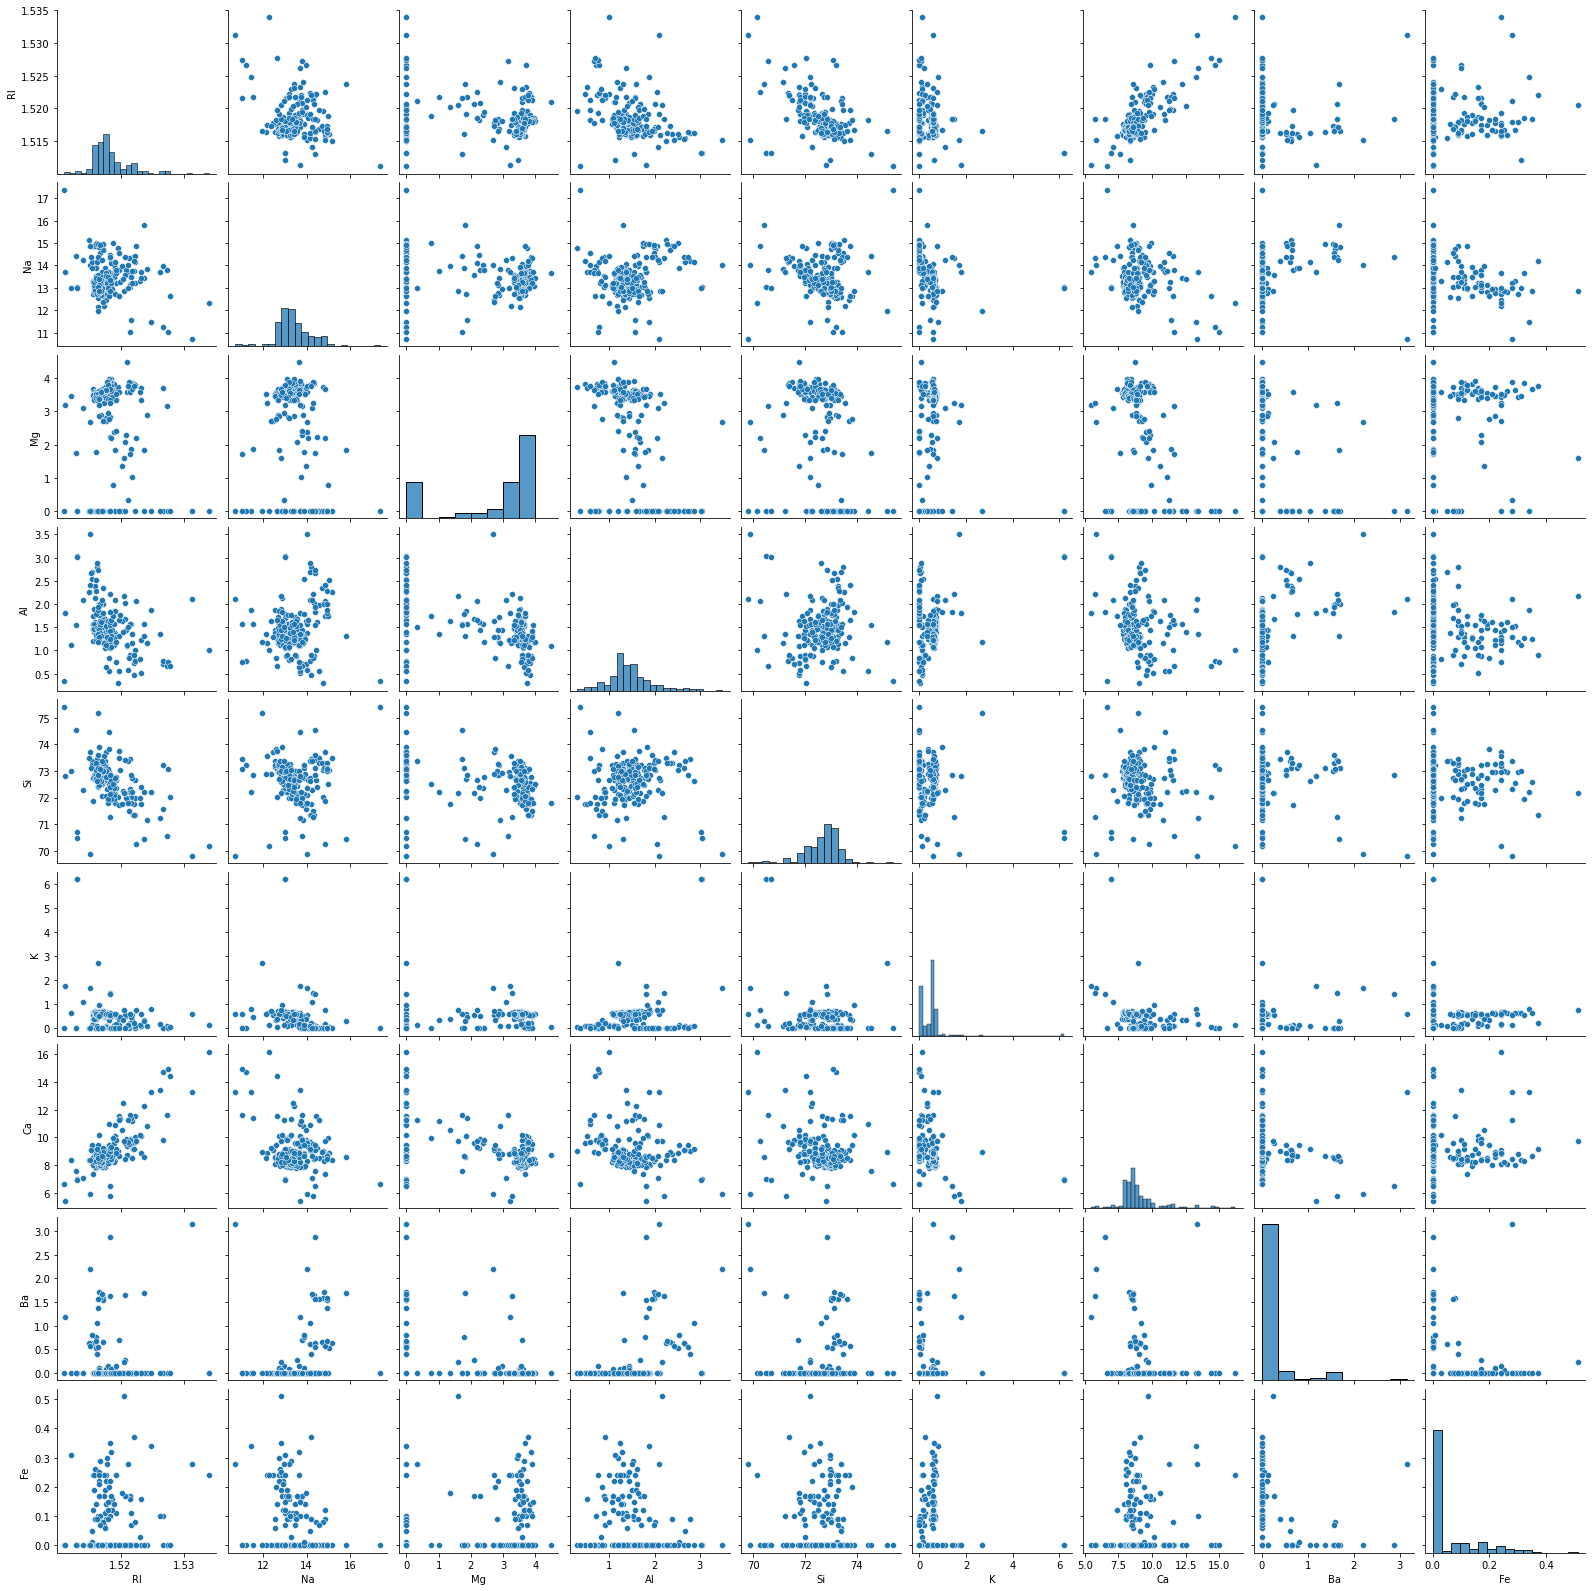

In [13]:
sns.pairplot(X)
# sns.set(font_scale=2)

# Scaling:-

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_scaled = mm.fit_transform(df)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_scaled,Y,test_size=0.3,random_state=42,stratify=Y)

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=14) # "n_neighbors" indicate the value of "K" which is randomly choosen as 14. 
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [14]:
y_pred = model.predict(x_test) # Predicting the value at teesting data data.
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.90625

In [33]:
# Lets apply cross validation
kfold= KFold(n_splits =4)
result = cross_val_score(model,x_train,y_train,cv=kfold)
print(result.mean())
print(result.std())
print(result)
# As the accuracies of each fold is near to each other hrus it shows algorithm perform well.

0.7665362731152205
0.15847066592778628
[0.55263158 0.91891892 0.91891892 0.67567568]


In [34]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[21  0  0  0  0  0]
 [ 0 23  0  0  0  0]
 [ 2  1  2  0  0  0]
 [ 0  0  0  2  0  2]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  9]]


C:\Users\rhtmi\anaconda last\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


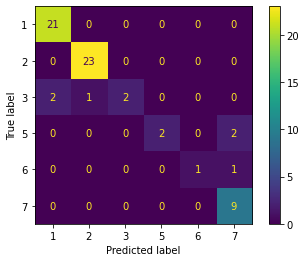

In [35]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test  )
plt.show()

In [40]:
 # Grid Search for Algorithm Tuning
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [41]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'n_neighbors': 1}


In [42]:
# model  with best params.
model = KNeighborsClassifier(n_neighbors=1) # "n_neighbors" indicate the value of "K" which is randomly choosen as 14. 
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.96875

In [43]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


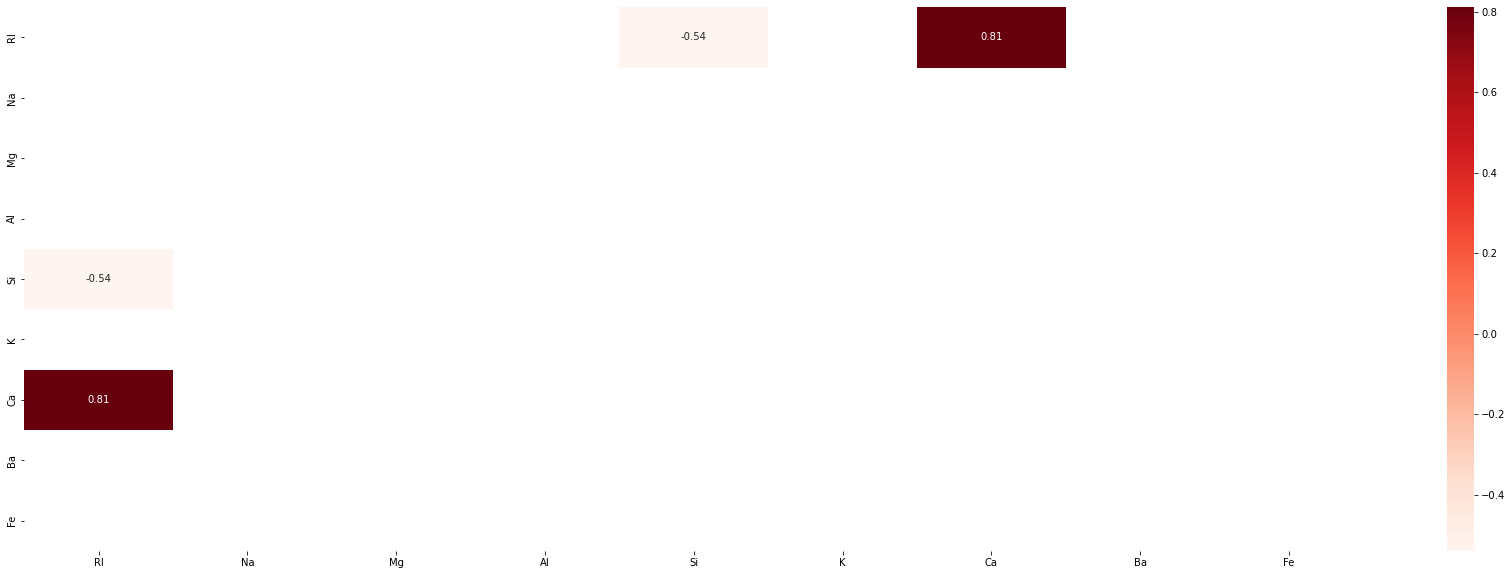

In [44]:
# Showing only those values thAT has having corr value >0.5
dfCorr = X.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

In [45]:
X_drop = X.drop(["RI"],axis = 1)

In [46]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df_scaled = mm.fit_transform(X_drop)

In [48]:
x_train,x_test,y_train,y_test = train_test_split(X_drop,Y,test_size=0.3,random_state=42,stratify=Y)
model = KNeighborsClassifier(n_neighbors=1) # "n_neighbors" indicate the value of "K" which is randomly choosen as 14. 
model.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [49]:
y_pred = model.predict(x_test) # Predicting the value at teesting data data.

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.75

# Performing PCA:-

In [51]:
from sklearn.decomposition import PCA
pca = PCA()
pva_values = pca.fit_transform(X)

cum_var = np.cumsum(pca.explained_variance_ratio_)*100

In [52]:
pca = pd.DataFrame()

pca["Cummulative Variance"] = pd.DataFrame(cum_var)
pca["Feature"] = pd.DataFrame(X.columns)
pca

,Cummulative Variance,Feature
0,47.758676,RI
1,74.058601,Na
2,84.720613,Mg
3,94.933304,Al
4,98.237542,Si
5,99.833567,K
6,99.976528,Ca
7,99.999985,Ba
8,100.000000,Fe


<AxesSubplot:xlabel='Feature', ylabel='Cummulative Variance'>

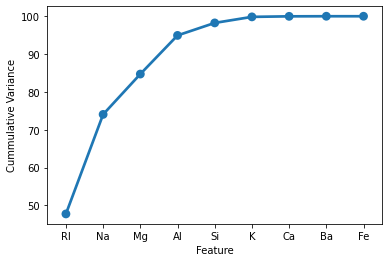

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pointplot(x= "Feature" , y= "Cummulative Variance", data= pca)

In [54]:
X_pca = X.iloc[:,0:4]

#scaling:-
X_pca_scaled= mm.fit_transform(X_pca)

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X_pca_scaled,Y,test_size=0.3,random_state=42,stratify=Y)
model = KNeighborsClassifier(n_neighbors=13) # "n_neighbors" indicate the value of "K" which is randomly choosen as 14. 
model.fit(x_train,y_train)


from sklearn.metrics import accuracy_score as ac
ac(model.predict(x_test),y_test)


0.703125